## Introdução ao Pandas

Baseado em https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1

In [1]:
import pandas as pd
import numpy as np

In [3]:
# e uma estrutura bidimensional, como uma tabela ou planilha
# constituido de COLUNAS, INDICES e LINHAS
df = pd.DataFrame()
print(df.head())

Empty DataFrame
Columns: []
Index: []


In [7]:
# podemos criar um dataframe vazio, como acima, e comecar a popular ele
df['professores'] = ['Digiampietri','Clodoaldo', 'Sara', 'Karina']

# podemos popular com qualquer tipo de dado!
df['topicos'] = [['ia', 'algoritmos'], ['ia', 'otimizacao'], ['ia', 'nao_supervisionado'], ['planejamento ia']]

df['discplina'] = [1,2,3,4]

In [9]:
# podemos criar dataframes ja feitos em um escopo
# passando um dicionario de colunas e valores
df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas' : [3,4,2,1,4],
                   'Prova' : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]})

df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


poderiamos ler arquivos estaticos tambem!

pd.read_csv, para ler arquivos .csv, formato comum de armazenar dados de tabelas

pd.read_xlsx, para ler arquivos Excel .xlsx, é necessário instalar uma biblioteca adicional pra esta funcionalidade.

pd.read_html, para ler tabelas diretamente de um website

Os tipos de dados que compõe as colunas podem ser verificados por um método próprio:

In [11]:
df.dtypes

Aluno         object
Faltas         int64
Prova          int64
Seminário    float64
dtype: object

É possível acessar a lista de colunas de forma bem intuitiva:

In [13]:
# ou list(df)
df.columns

Index(['Aluno', 'Faltas', 'Prova', 'Seminário'], dtype='object')

Os nomes das colunas podem ser usadas pra acessar seus valores:

In [14]:
df['Aluno']

0    Wilfred
1      Abbie
2      Harry
3      Julia
4     Carrie
Name: Aluno, dtype: object

Para DataFrames, .describe() também é uma boa forma de verificar resumidamente a disposição estatística dos dados numéricos:

In [15]:
df.describe()

,Faltas,Prova,Seminário
count,5.00000,5.000000,5.00000
mean,2.80000,6.000000,8.10000
std,1.30384,2.915476,0.65192
min,1.00000,2.000000,7.50000
25%,2.00000,5.000000,7.50000
50%,3.00000,6.000000,8.00000
75%,4.00000,7.000000,8.50000
max,4.00000,10.000000,9.00000


Outra tarefa comum aplicada em DataFrames é ordená-los por determinada coluna:

In [16]:
df.sort_values(by="Seminário")

,Aluno,Faltas,Prova,Seminário
1,Abbie,4,7,7.5
3,Julia,1,10,7.5
4,Carrie,4,6,8.0
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0


Note que simplesmente usar o método sort_values não modifica o nosso DataFrame original, ou seja precisamos atribuir para o mesmo df

In [17]:
# para atribuir ao df os resultado em ordem deveriamos
# df = df.sort_values(by="Seminário")
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


Para selecionar de acordo com critérios condicionais, se usa o que se chama de Boolean Indexing.

Suponha que queiramos selecionar apenas as linhas em que o valor da coluna Seminário seja acima de 8.0, podemos realizar esta tarefa passando a condição diretamente como índice:

In [18]:
df.loc[df["Seminário"] > 8.0]

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0


Este tipo de indexação também possibilita checar condições de múltiplas colunas. Diferentemente do que estamos habituados em Python, aqui se usam operadores bitwise, ou seja, `&`, `|`, `~` ao invés de `and`, `or`, `not`, respectivamente. Suponha que além de `df["Seminário"] > 8.0` queiramos que o valor da coluna `Prova` não seja menor que 3:

In [20]:
df.loc[(df["Seminário"] > 8.0) & (df["Prova"] > 3)]

,Aluno,Faltas,Prova,Seminário
2,Harry,2,5,9.0


---

In [21]:
df = pd.read_csv('dados.csv')

In [23]:
# o metodo head(n) mostra as 5 primeiras lihnas (default) ou as n primeiras, para se ter uma ideia do dataframe
df.head()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [24]:
# mesmo comportamento para o tail
df.tail()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55
1996,800,3,1.0,1.0,107,Tijuca,540000,5046.73


o metodo unique() mostra todos os valores unicos de um set de coluinas passado

In [25]:
df["bairro"].unique()

array(['Botafogo', 'Copacabana', 'Gávea', 'Grajaú', 'Ipanema', 'Leblon',
       'Tijuca'], dtype=object)

Também parece interessante verificarmos a hegemoneidade da nossa amostra em relação aos bairros. Pra tarefas de contar valores podemos sempre aproveitar de outro método disponível, o .value_counts(), também veremos um pouco mais abaixo como visualizar estes valores em forma de gráfico de barras.

In [26]:
df["bairro"].value_counts()

Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: bairro, dtype: int64

In [27]:
# normalizando o value counts para expressar porcentagem
df["bairro"].value_counts(normalize=True)

Copacabana    0.173260
Tijuca        0.170756
Botafogo      0.153731
Ipanema       0.140711
Leblon        0.140210
Grajaú        0.118678
Gávea         0.102654
Name: bairro, dtype: float64

In [28]:
# podemos ver estatisticas simples dos dados com o df.describe()
df.describe()

,condominio,quartos,suites,vagas,area,preco,pm2
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1.997000e+03,1997.00000
mean,971.087631,2.128693,1.039559,1.153230,90.051577,1.229410e+06,13256.74635
std,653.893691,0.793866,0.443091,0.453837,46.417486,1.155809e+06,6977.37614
min,1.000000,1.000000,0.000000,0.000000,19.000000,1.300000e+05,2600.00000
25%,550.000000,1.000000,1.000000,1.000000,60.000000,5.600000e+05,7894.74000
50%,800.000000,2.000000,1.000000,1.000000,80.000000,9.000000e+05,11904.76000
75%,1200.000000,3.000000,1.000000,1.000000,110.000000,1.550000e+06,17156.86000
max,7071.000000,3.000000,3.000000,4.000000,475.000000,1.360000e+07,76666.67000


In [29]:
# ou alguma estatistica mais enxuta como a media de uma coluna unica
df['condominio'].mean()

971.0876314471708

Agrupar os dados se baseando em certos critérios é outro processo que o pandas facilita bastante com o .groupby(). Esse método pode ser usado para resolver os mais amplos dos problemas. Abaixo vemos um agrupamento simplista

Abaixo agrupamos o nosso DataFrame pelos valores da coluna "bairro", e em seguida aplicamos o .mean() para termos um objeto GroupBy com informação das médias agrupadas pelos valores da coluna bairros.

In [30]:
df.groupby("bairro").mean()

,condominio,quartos,suites,vagas,area,preco,pm2
bairro,,,,,,,
Botafogo,914.475570,2.107492,1.048860,1.159609,83.837134,1.010614e+06,12034.486189
Copacabana,991.861272,2.101156,1.034682,1.080925,101.855491,1.216344e+06,11965.298699
Grajaú,619.940928,2.097046,0.970464,1.130802,79.949367,4.788869e+05,6145.624473
Gávea,985.234146,2.058537,1.029268,1.200000,88.497561,1.454571e+06,16511.582780
Ipanema,1357.120996,2.181495,1.192171,1.220641,100.615658,2.033096e+06,19738.407794
Leblon,1260.010714,2.207143,1.064286,1.164286,91.832143,1.946193e+06,20761.351036
Tijuca,681.175953,2.131965,0.944282,1.143695,81.457478,5.750780e+05,7149.804985


É comum queremos aplicar uma função qualquer aos dados, ou à parte deles, neste caso o pandas fornece o método .apply. Por exemplo, para deixar os nomes dos bairros como apenas as suas três primeiras letras:

In [31]:
def truncar(bairro):
    return bairro[:3]

df["bairro"].apply(truncar)

0       Bot
1       Bot
2       Bot
3       Bot
4       Bot
5       Bot
6       Bot
7       Bot
8       Bot
9       Bot
10      Bot
11      Bot
12      Bot
13      Bot
14      Bot
15      Bot
16      Bot
17      Bot
18      Bot
19      Bot
20      Bot
21      Bot
22      Bot
23      Bot
24      Bot
25      Bot
26      Bot
27      Bot
28      Bot
29      Bot
       ... 
1967    Tij
1968    Tij
1969    Tij
1970    Tij
1971    Tij
1972    Tij
1973    Tij
1974    Tij
1975    Tij
1976    Tij
1977    Tij
1978    Tij
1979    Tij
1980    Tij
1981    Tij
1982    Tij
1983    Tij
1984    Tij
1985    Tij
1986    Tij
1987    Tij
1988    Tij
1989    Tij
1990    Tij
1991    Tij
1992    Tij
1993    Tij
1994    Tij
1995    Tij
1996    Tij
Name: bairro, Length: 1997, dtype: object

ou aplicar funcoes um pouco mais trabalhadas, editando ou jogando o resultado em outra coluna

In [32]:
df.head(1)

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48


In [38]:
def preco_por_quarto(preco, qtd_quarto):
    return float(preco / qtd_quarto)

df['preco_por_vaga'] = df.apply(lambda k: preco_por_quarto(k['preco'], k['quartos']),axis=1)

Uma das tarefas na qual o pandas é reconhecidamente poderoso é a habilidade de tratar dados incompletos. Por muitos motivos pode haver incompletude no dataset, o np.nan é um valor especial definido no Numpy, sigla para Not a Number, o pandas preenche células sem valores em um DataFrame lido com np.nan.

Vamos criar um novo dataframe usando as 5 primeiras linhas do nosso original, usando o já visto .head(). Abaixo é usado o .replace para substituir um valor específico por um NaN.

In [39]:
df2 = df.head()
df2 = df2.replace({"pm2": {12031.25: np.nan}})
df2

,condominio,quartos,suites,vagas,area,bairro,preco,pm2,preco_por_vaga
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48,340000.0
1,800,1,0.0,1.0,64,Botafogo,770000,NaN,770000.0
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07,600000.0
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00,700000.0
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55,515000.0


In [40]:
# podemos apagar valores nulos
df2.dropna()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2,preco_por_vaga
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48,340000.0
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07,600000.0
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00,700000.0
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55,515000.0


In [41]:
# podemos preencher
df2.fillna('2000000000')

,condominio,quartos,suites,vagas,area,bairro,preco,pm2,preco_por_vaga
0,350,1,0.0,1.0,21,Botafogo,340000,16190.5,340000.0
1,800,1,0.0,1.0,64,Botafogo,770000,2000000000,770000.0
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07,600000.0
3,700,1,1.0,1.0,70,Botafogo,700000,10000,700000.0
4,440,1,0.0,1.0,44,Botafogo,515000,11704.5,515000.0


Acaba sendo muitas vezes conveniente termos um método que indica quais valores de um dataframe são NaN e quais não são:

In [42]:
df2.isna()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2,preco_por_vaga
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [43]:
# ou sabe ser qualquer valor de qualquer coluna e nulo
df2.isna().any()

condominio        False
quartos           False
suites            False
vagas             False
area              False
bairro            False
preco             False
pm2                True
preco_por_vaga    False
dtype: bool

---

Partiremos agora para visualização de dados com o pandas. Os métodos de visualização do pandas são construídos com base no matplotlib para exploração rápida dos dados. Para se ter mais liberdade no conteúdo e possibilidades de visualização se recomenda usar diretamente o matplotlib ou ainda, para visualização estatística, o seaborn

Comecemos verificando que tanto Series como DataFrame possuem um método `.plot()` que também é um atributo e pode ser encadeado para gerar visualização de diversos tipos, como histograma, área, pizza e dispersão, com respectivamente  `.hist()`, `.area()`, `.pie()` e  `.scatter()`, além de vários [outros](https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting).

Vamos verificar a distribuição dos preços usando o encadeamento `.plot.hist()`, o eixo x, que é o preço, está numa escala de \*10^7, como mostrado na imagem:

In [47]:
# comando especial quie diz para o notebook mostrar o grafico na celula
%matplotlib inline

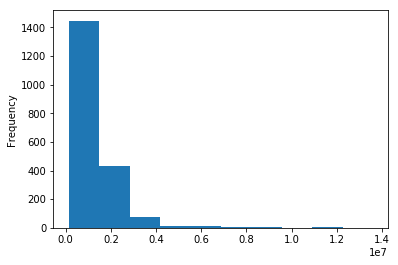

In [48]:
df["preco"].plot.hist()

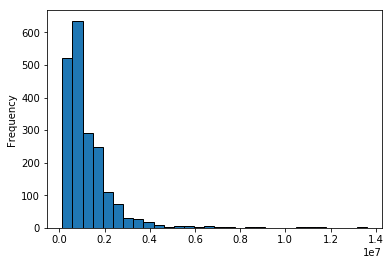

In [49]:
df["preco"].plot.hist(bins=30, edgecolor='black')

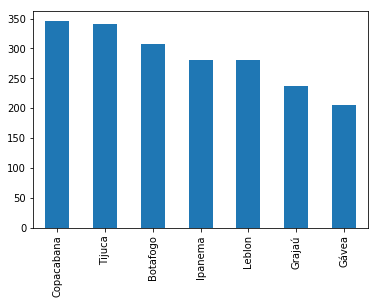

In [50]:
df["bairro"].value_counts().plot.bar()